# Task 7: Interpret the Significance of Promoter-Enhancer Predictions (Part 3)
## Optimize the scoring criteria to enhance features that are simultaneously highly conserved and substantially reported:
- Add labels to other genes within the ACE2-spanning TAD;  
- Test **phastConsElements** as an eval_score and reduce bin size for averaged methodology;  
- Investigate cCREs based on:  
    - Category (e.g. promoters, enhancer, CTCF binding sites);  
    - Gene expression (e.g. per tissue, per ACE2 similarity);  
    - TF binding (e.g. hormone receptors, ZFX, ELK1, CUDEC2, MAZ, & others in "[Sex Differences in Gene Expression and Regulatory Networks across 29 Human Tissues](https://www.cell.com/cell-reports/fulltext/S2211-1247(20)30776-2)"  
    - Comparison against FlowFISH enhancers;  
    
## Step 1.
- Obtain genes in chrX:15,200,000-15,800,000 using UCSC Table Browser (**hg38 GENCODE v32 knownCanonical**). If there are genes listed in the databases with different symbols or that are not outputted by UCSC, perform a manual search (e.g. Ensembl).  

Gene for labelling|Genes from databases
:--:|:--:
ASB9|ASB9
ASB11|ASB11
PIGA|PIGA
VEGFD|VEGFD, FIGF
PIR|BX537579, PIR
BMX|BMX
ACE2|ACE2
AC097625.2
AC097625.1
CLTRN|TMEM27
AC003669.1
CA5BP1|AK125384, CA5BP1
AC112497.2
AC112497.1|AC112497.1
CA5B|CA5B
INE2
ZRSR2|ZRSR2
|AP1S2
|PIR-FIGF
|SNORA7

- Label cCREs as one of four types:  

Type|ENCODE (SCREEN cCREs)|Ensembl Regulatory Build|EpiRegio|PSYCHIC|NCBI|FANTOM5|EDPnew
:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:
Promoter/TSS|cCREs with promoter-like signatures (cCRE-PLS)|promoter, promoter_flanking_region, TSS||-|promoter|TSS|Promoter
Transcriptional Regulators (i.e. enhancers and silencers)|cCREs with enhancer-like signatures (cCRE-pELS and dELS), DNase-H3K4me3|enhancer, open_chromatin_region|Activators, Repressors|-|enhancer, transcriptional_cis_regulatory_region|Enhancer
DNA Binding Site|CTCF-bound, CTCF-only|CTCF_binding_site, TF_binding_site||-|protein_bind
Conserved Region||||-|conserved_region

- **phastConsElements:** Score from 0 to 1000 for conserved genomic regions.


# Stacking R Plots: https://felixfan.github.io/stacking-plots-same-x/


## Combine Gene + Type:
- For every gene in chrX:15,200,000-15,800,000: **Transcriptional Regulator (e.g. enhancer, silencer); DNA-Binding Site; Promoter/TSS; Conserved Region**  


# Combine Gene + Score:
- For every gene in chrX:15,200,000-15,800,000: score 1 **(phyloP*k*count)**, score 2 **(phastCons*k*count)**, score 3 **(phastConsElements*k*count)**

# Combine Gene + Type+ Score:
- For every gene in chrX:15,200,000-15,800,000: Classify highest scoring cCREs per type/per gene.

# For visualizing scores attributed to ACE2-cCREs only:

# TO-DO:
- Add gene directionality to determine the legiemacy of predicted promoters (and hence perhaps other cCREs);  
- Make AC1124971.1 visible as a segment/point;  


# Relevance of findings:
- Compare gene plots according to:  
1) Gene expression (e.g. per tissue, per ACE2 similarity);  
2) TF binding (e.g. hormone receptors, ZFX, ELK1, CUDEC2, MAZ, & others in "Sex Differences in Gene Expression and Regulatory Networks across 29 Human Tissues"

## Measuring similarity between genes: According to expression, protein interactions, protein localization, and genetic interaction.
- [Measuring similarity between gene expression profiles: a Bayesian approach](ncbi.nlm.nih.gov/pmc/articles/PMC2788366/): Grouping genes into clusters on the basis of similarity between their expression profiles using [**BayesGen**](https://rdrr.io/github/isglobal-brge/bayesGen/)  
- [SIGN: similarity identification in gene expression](https://academic.oup.com/bioinformatics/article-abstract/35/22/4830/5518919?redirectedFrom=fulltext): Uses pathway activities and their expression patterns to identify similarities between biological samples in R's [**SIGN** package](https://cran.r-project.org/web/packages/SIGN/)  
- [iDEP: an integrated web application for differential expression and pathway analysis of RNA-Seq data](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2486-6): http://bioinformatics.sdstate.edu/idep/  
- [The landscape of sex-differential transcriptome and its consequent selection in human adults](https://bmcbiol.biomedcentral.com/articles/10.1186/s12915-017-0352-z): Sex-differential gene expression (SDE) scores of 0 for non-differentially expressed genes, positive values for women-biased genes, and negative values men-biased genes.  
- [Sex Differences in Gene Expression and Regulatory Networks across 29 Human Tissues](https://www.cell.com/cell-reports/fulltext/S2211-1247(20)30776-2): TF sex-biased targeting of genes.  


### Other genes in chrX:15,200,000-15,800,000:

Gene|XCI Status|Sex-Differential Expression|Notable
:---:|:---:|:---:|:---:
ACE2|Escape|Male
ASB9|Inactive
ASB11|Variable
PIGA|Inactive
VEGFD (FIGF)|Inactive|Female
PIR|Variable/escape
PIRFIGF|
BMX|Variable
CLTRN (TMEM27)|Variable/escape|Female
CA5BP1|Escape
CA5B
ZRSR2||Female
AC112497.1

Gene|XCI Status
:---:|:---:
ACE2|Escape
ASB9|Inactive
ASB11|Variable
PIGA|Inactive
VEGFD (FIGF)|Inactive
PIR|Variable/escape
BMX|Variable
CLTRN (TMEM27)|Variable/escape
CA5BP1|Escape

[Expression Atlas](https://www.ebi.ac.uk/gxa/home):  
**GTEx:**
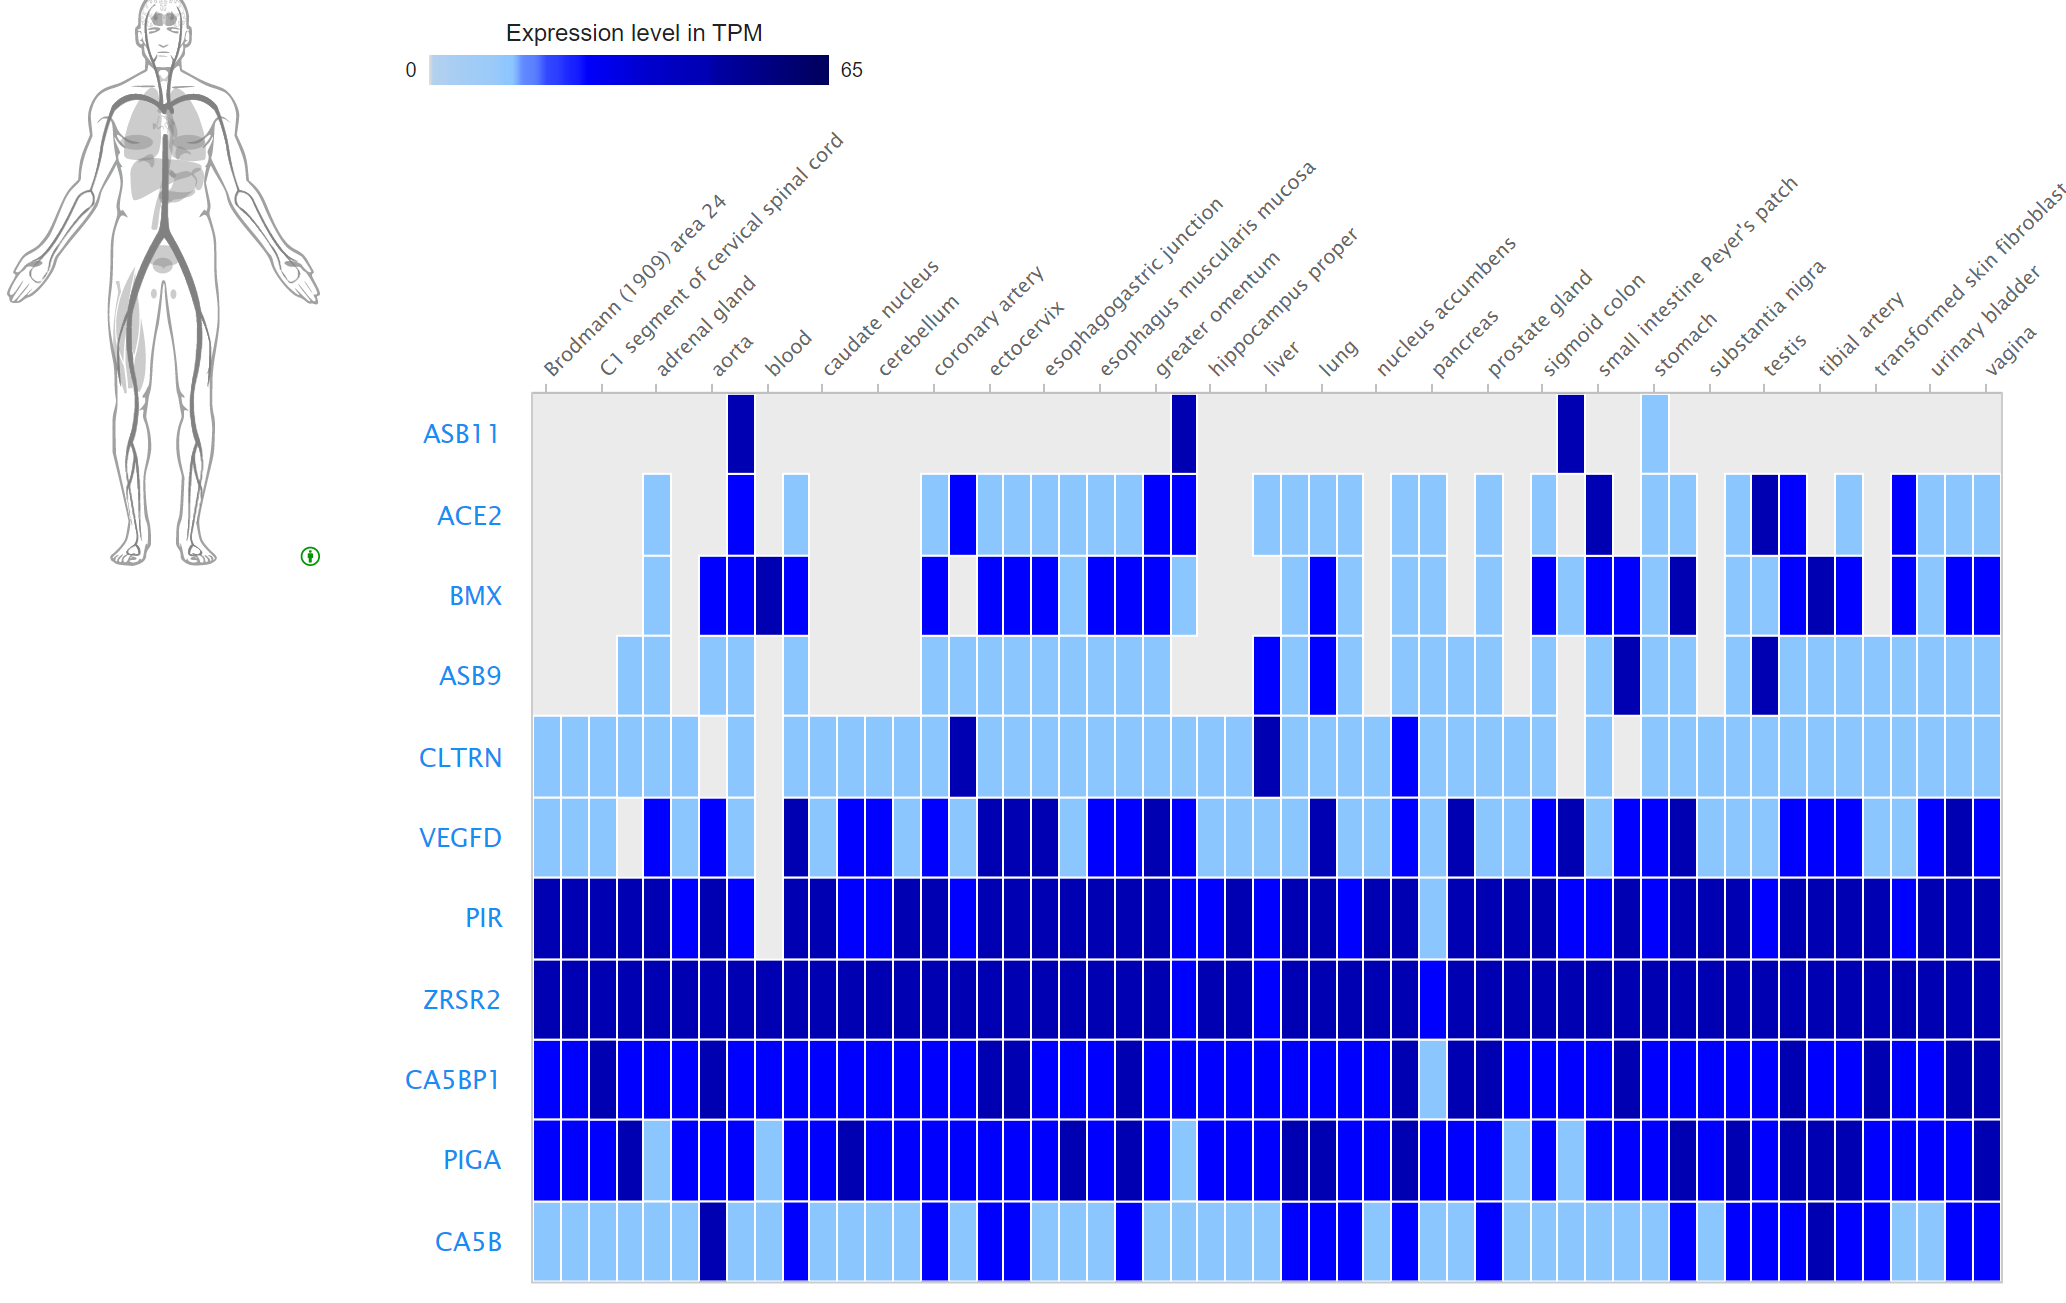
**FANTOM5:**
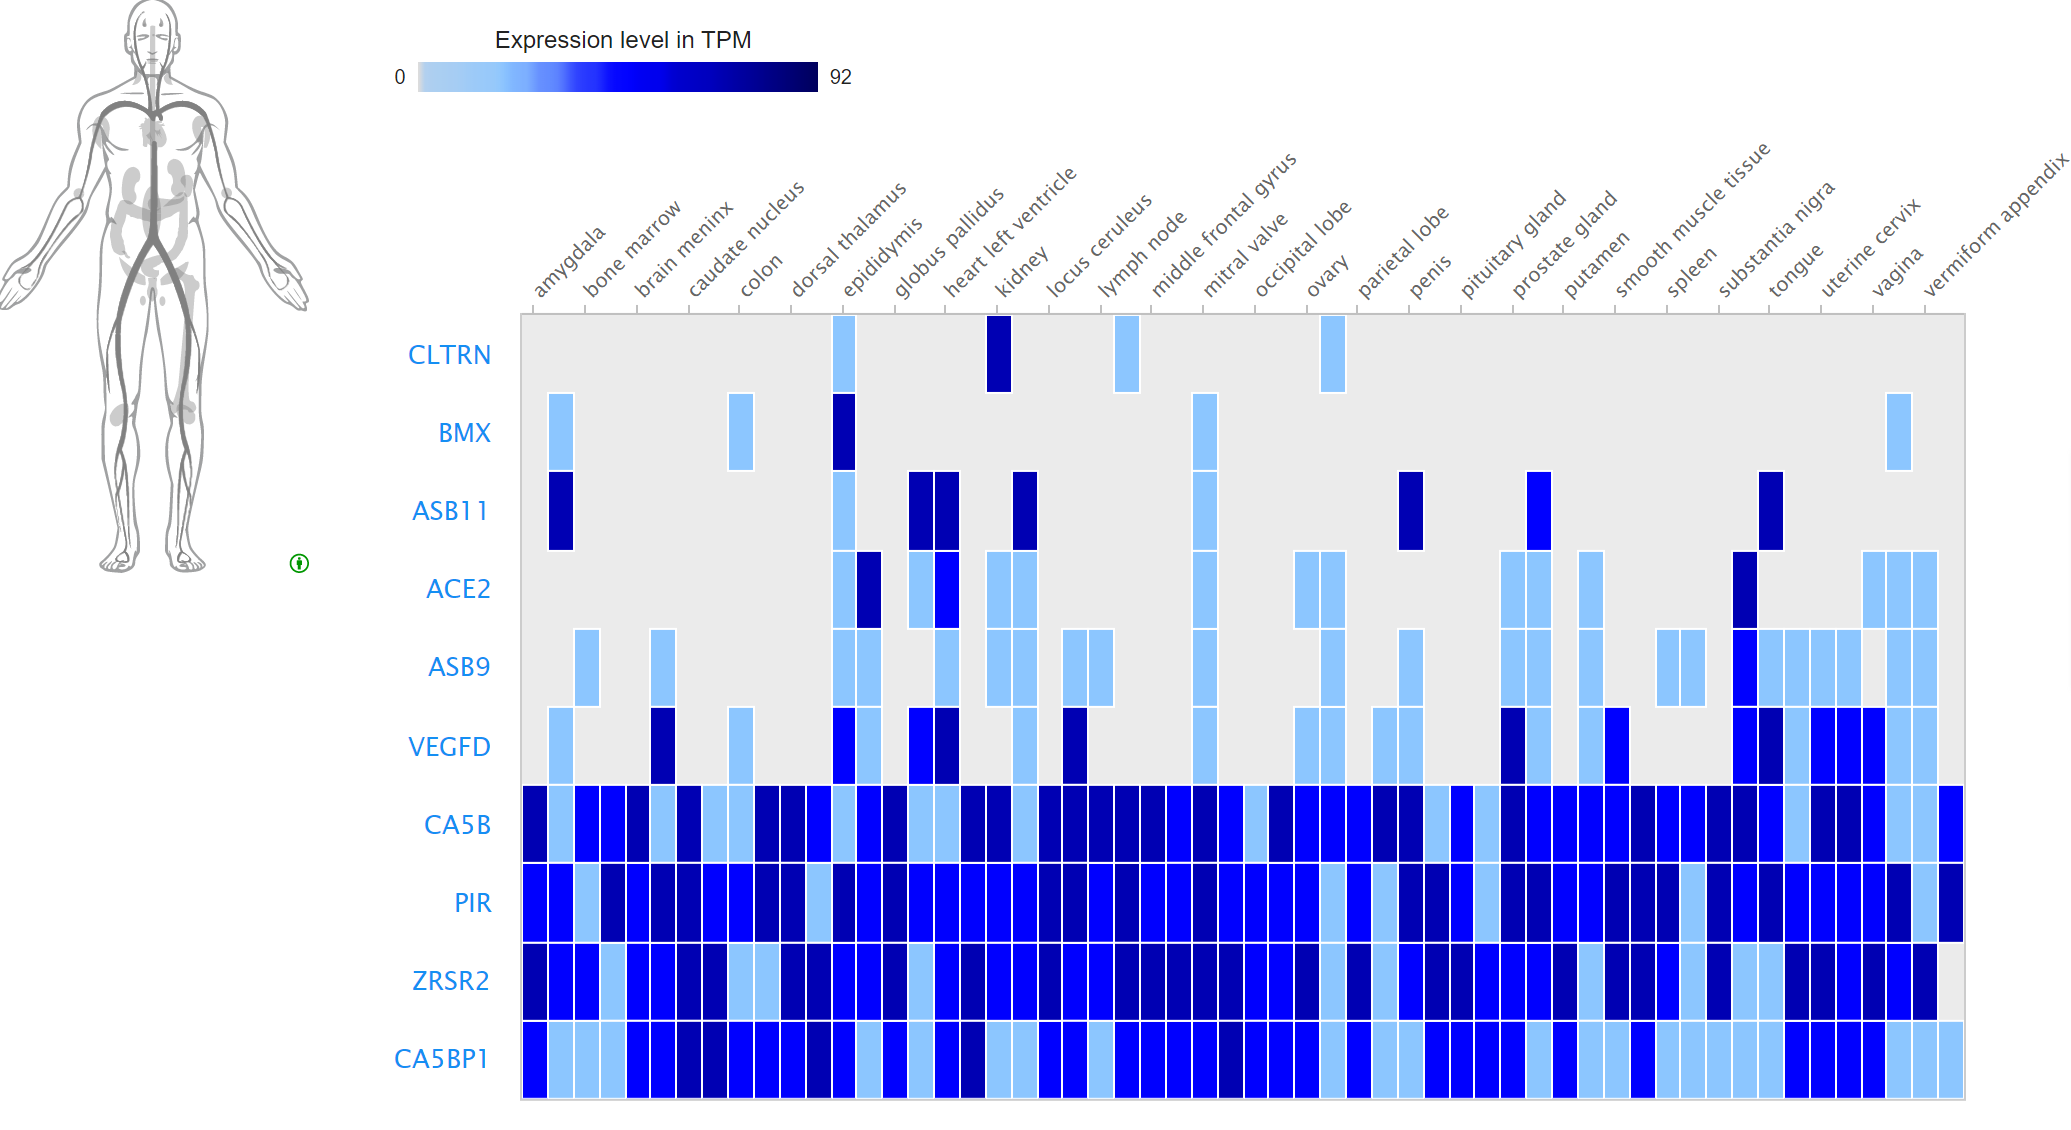


# Fairness of Data:
- Because the "gene search" was only performed for ACE2, the **count** for ACE2-linked cCREs will inevitably be higher.  
- To correct for this, only results from the "region search" will be used: Only *EpiRegio*, *FANTOM5*, and *EDPnew* output related genes in the region search. Thus, only these databases will be used.